In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 17 ##

### Swain vs Alabama 

In [2]:
eligible_population = make_array(0.26, 0.74)

In [3]:
# Simulation

counts = make_array()

for i in np.arange(10000):
    new_count = 100 * sample_proportions(100, eligible_population).item(0)
    counts = np.append(counts, new_count)

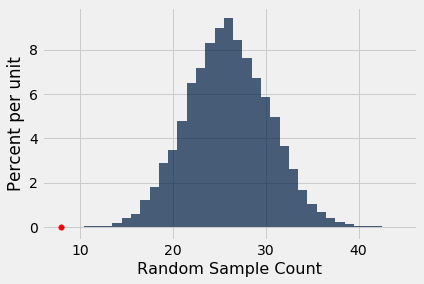

In [4]:
# Visualization

Table().with_column('Random Sample Count', counts).hist(bins = np.arange(9.5, 45, 1))

observed_count = 8
plots.scatter(observed_count, 0, color='red', s=30);

In [6]:
# P-Value Calculation
sum(counts <= observed_count) / len(counts)

0.0

### Mendel and Pea Flowers

In [7]:
model = make_array(0.75, 0.25)

In [8]:
# Simulation

distances = make_array()

for i in np.arange(10000):
    new_distance = abs(100 * sample_proportions(929, model).item(0) - 75)
    distances = np.append(distances, new_distance)

In [9]:
observed_distance =  abs(100*(705/929) - 75)
observed_distance

0.8880516684607045

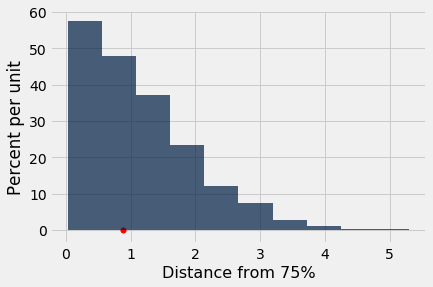

In [10]:
Table().with_column('Distance from 75%', distances).hist()
plots.scatter(observed_distance, 0, color='red', s=30);

In [11]:
# P-Value Calculation
sum(distances >= observed_distance) / len(distances)

0.53859999999999997

## Alameda County Jury Panels

In [12]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [13]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

In [14]:
eligible = jury.column('Eligible')

tvds = make_array()

for i in np.arange(10000):
    sample_distribution = sample_proportions(1453, eligible)
    new_tvd = total_variation_distance(sample_distribution, eligible)
    tvds = np.append(tvds, new_tvd)
    

In [15]:
observed_tvd = total_variation_distance(jury.column('Panels'), eligible)
observed_tvd

0.14000000000000001

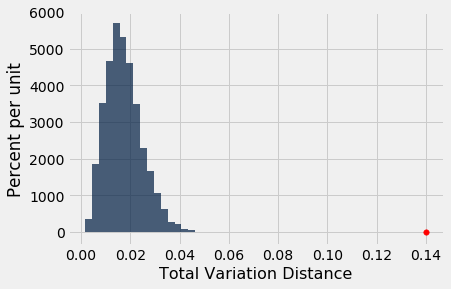

In [16]:
Table().with_column('Total Variation Distance', tvds).hist(bins = 20)
plots.scatter(observed_tvd, 0, color='red', s=30);

In [17]:
# P-Value Calculation
sum(tvds >= observed_tvd) / len(tvds)

0.0

## Maternal Birthweights and Smoking

In [ ]:
baby = Table.read_table('baby.csv')
baby

In [ ]:
smoking_and_birthweight = baby.select('Maternal Smoker', 'Birth Weight')
smoking_and_birthweight